In [26]:
# Enviroment notes
# Running on python 3.11.7
# Pandas version 2.2.1
# Data analysis
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
# Data manipulation
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
# load the CSV data into a DataFrame
df = pd.read_csv('Phishing_Email.csv')

In [4]:
# Look at header data
df.head(n=10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [5]:
# look at features
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [6]:
# count of safe emails in the dataset and count of phishing emails in the dataset
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [7]:
# check for null values in all columns
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [8]:
# Print all emails with blank text
df[df['Email Text'].isnull()]

,Unnamed: 0,Email Text,Email Type
31,31,NaN,Phishing Email
387,387,NaN,Phishing Email
1883,1883,NaN,Phishing Email
2049,2049,NaN,Phishing Email
2451,2451,NaN,Phishing Email
2972,2972,NaN,Phishing Email
3627,3627,NaN,Phishing Email
3806,3806,NaN,Phishing Email
5763,5763,NaN,Phishing Email
6299,6299,NaN,Phishing Email


In [9]:
df.dropna(subset=["Email Text"], inplace = True) #remove blank text emails

In [11]:
df[df['Email Text'].isnull()] #check if there are any blank text emails

,Unnamed: 0,Email Text,Email Type


In [12]:
df.head()



,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [13]:
email_type = df['Email Type'].value_counts()

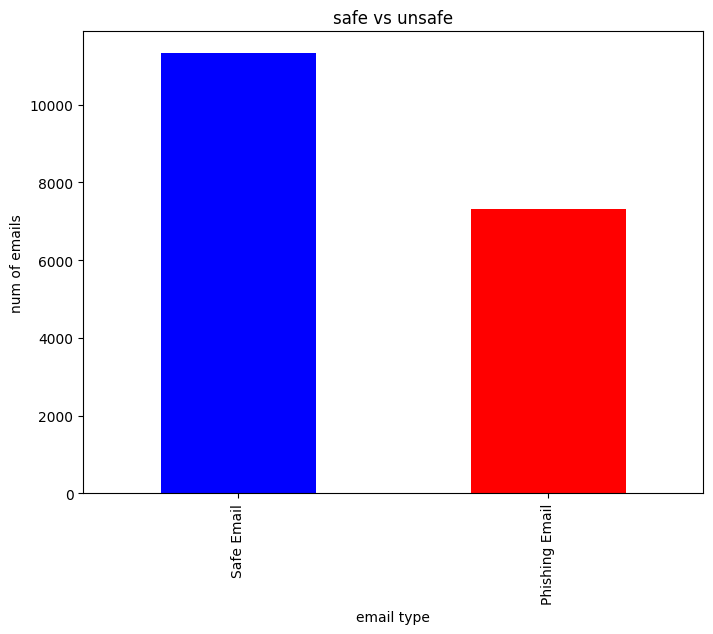

In [14]:
plt.figure(figsize=(8, 6))
email_type.plot(kind='bar', color=['blue', 'red'])
plt.title('safe vs unsafe')
plt.xlabel('email type')
plt.ylabel('num of emails')
plt.show()

In [16]:
phishing_email = df[df['Email Type'] == 'Phishing Email']

In [17]:
phishing_email

,Unnamed: 0,Email Text,Email Type
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
10,10,make her beg you to give it to her everynight ...,Phishing Email
...,...,...,...
18634,18635,congratulations you have won ! ! ! pls contact...,Phishing Email
18637,18638,empty,Phishing Email
18638,18639,strong buy alert : monthly newsletter topstock...,Phishing Email
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email


In [19]:
dict = {
    "Phishing Email" : True ,
    "Safe Email" : False
}
target = df["Email Type"]
target.map(dict)
df["Email Type"] = df["Email Type"].map(dict)

In [21]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",False
1,1,the other side of * galicismos * * galicismo *...,False
2,2,re : equistar deal tickets are you still avail...,False
3,3,\nHello I am your hot lil horny toy.\n I am...,True
4,4,software at incredibly low prices ( 86 % lower...,True


In [24]:
from sklearn.model_selection import train_test_split


In [33]:
count = CountVectorizer()
X = count.fit_transform(df['Email Text'])
Y = df['Email Type']


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=11,test_size=.86) #you can decide the size of the training data.

In [37]:
x_train.shape #display dimensions.
x_test.shape

(16026, 163224)

In [38]:
from sklearn.neighbors import KNeighborsClassifier #KNN comparing to neighbors functions, connects to nearest neighbor

In [39]:
knn = KNeighborsClassifier()
knn.fit(X=x_train, y=y_train)
#this is used to initialize KNN.

KNeighborsClassifier()

In [42]:
predicted = knn.predict(X=x_test)
expected = y_test
predicted[:20]
#basically displays the predicted values.

array([False, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True])